In [314]:
import numpy as np
import pandas as pd
import pickle
import plotly.express as px
import matplotlib.pyplot as plt

## Setting up boundaries and grids for our prediction areas

For prediction: chose two similarly-sized neighborhoods (rectangles) with very different location, population density, population non-white, adult asthma prevalence, life expectancy, social vulnerabilty index, and prevalence of emissions point sources.

In [211]:
# Neighborhood 1
n1_top_lat = 29.686200
n1_bot_lat = 29.672427
n1_right_lon = -95.319700
n1_left_lon = -95.367249

# Neighborhood 2
n2_top_lat = 29.763409
n2_bot_lat = 29.750580
n2_right_lon = -95.486371
n2_left_lon = -95.526338

In [212]:
n1_top_lat - n1_bot_lat

0.01377300000000048

In [213]:
n2_top_lat-n2_bot_lat

0.01282899999999998

In [214]:
n1_right_lon - n1_left_lon

0.047549000000003616

In [215]:
n2_right_lon - n2_left_lon

0.039966999999990094

In [216]:
# Choosing increments / step size
print((n1_top_lat - n1_bot_lat)/6, "n1 N-S step")
print((n1_right_lon - n1_left_lon)/20, "n1 E-W step")
print((n2_top_lat-n2_bot_lat)/6, "n2 N-S step")
print((n2_right_lon - n2_left_lon)/17, "n2 E-W step")

0.00229550000000008 n1 N-S step
0.002377450000000181 n1 E-W step
0.0021381666666666632 n2 N-S step
0.0023509999999994174 n2 E-W step


In [217]:
# create grid
# n1
n1_lats = np.linspace(n1_bot_lat, n1_top_lat, 6)
n1_lons = np.linspace(n1_right_lon, n1_left_lon, 20)

# n2
# n1
n2_lats = np.linspace(n2_bot_lat, n2_top_lat, 6)
n2_lons = np.linspace(n2_right_lon, n2_left_lon, 17)

In [218]:
lats = []
lons = []
for lat in n1_lats:
    for lon in n1_lons:
        lats.append(lat)
        lons.append(lon)
print(len(lats))
print(len(lons))
n1_dict = {"lat": lats, "lon": lons}

120
120


In [219]:
lats = []
lons = []
for lat in n2_lats:
    for lon in n2_lons:
        lats.append(lat)
        lons.append(lon)
print(len(lats))
print(len(lons))
n2_dict = {"lat": lats, "lon": lons}

102
102


In [220]:
df_n1 = pd.DataFrame(n1_dict)
df_n1 = df_n1.round(6)
df_n1

,lat,lon
0,29.672427,-95.319700
1,29.672427,-95.322203
2,29.672427,-95.324705
3,29.672427,-95.327208
4,29.672427,-95.329710
...,...,...
115,29.686200,-95.357239
116,29.686200,-95.359741
117,29.686200,-95.362244
118,29.686200,-95.364746


In [221]:
df_n2 = pd.DataFrame(n2_dict)
df_n2 = df_n2.round(6)
df_n2

,lat,lon
0,29.750580,-95.486371
1,29.750580,-95.488869
2,29.750580,-95.491367
3,29.750580,-95.493865
4,29.750580,-95.496363
...,...,...
97,29.763409,-95.516346
98,29.763409,-95.518844
99,29.763409,-95.521342
100,29.763409,-95.523840


In [222]:
df_predict = df_n1.append(df_n2)
df_predict

/var/folders/w0/hp1p0mz546x0rnc9mft_s83w0000gn/T/ipykernel_57563/3246832723.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,lat,lon
0,29.672427,-95.319700
1,29.672427,-95.322203
2,29.672427,-95.324705
3,29.672427,-95.327208
4,29.672427,-95.329710
...,...,...
97,29.763409,-95.516346
98,29.763409,-95.518844
99,29.763409,-95.521342
100,29.763409,-95.523840


In [223]:
# neighborhood 1
px.set_mapbox_access_token("pk.eyJ1IjoidmlzaGFsdmpvc2VwaCIsImEiOiJjbDM2Y3hxaTMzYnlsM2JwZmoxZm9sZjZxIn0.ARpv_l4hUbukED2DPkPuxg")
fig = px.scatter_mapbox(df_predict, lat="lat", lon="lon", size_max=1, zoom=10)
fig.show()

In [224]:
# Export
filepath = "../../data/cleaned/predict.csv"
df_predict.to_csv(filepath)

## Merging together the prediction data (met, highway, facility)

In [244]:
df_met = pd.read_csv("../../data/cleaned/met_data_predict.csv", index_col=0)
df_fac = pd.read_csv("../../data/cleaned/facility_data_predict.csv", index_col=0)
df_traffic = pd.read_csv("../../data/cleaned/traffic_data_predict.csv", index_col=0)

In [245]:
# further prepare facilities data
df_fac = df_fac.rename(columns = {"latitude": "lat", "longitude": "lon"})
df_fac = df_fac[df_fac.columns.drop(list(df_fac.filter(regex='latitude')))]
df_fac = df_fac[df_fac.columns.drop(list(df_fac.filter(regex='longitude')))]
df_fac = df_fac[df_fac.columns.drop(list(df_fac.filter(regex='NO2')))]
df_fac

,lat,lon,14464311-RailYard-high_dist,14464311-RailYard-high_emsdist,14464611-RailYard-high_dist,14464611-RailYard-high_emsdist,14487911-RailYard-low_dist,14487911-RailYard-low_emsdist,14488111-RailYard-high_dist,14488111-RailYard-high_emsdist,...,6642011-FoodPlants-high_dist,6642011-FoodPlants-high_emsdist,6642511-ChemicalPlant-high_dist,6642511-ChemicalPlant-high_emsdist,6642811-FoodPlants-low_dist,6642811-FoodPlants-low_emsdist,6671811-Institution-low_dist,6671811-Institution-low_emsdist,9114211-FoodPlants-low_dist,9114211-FoodPlants-low_emsdist
0,29.672427,-95.319700,4.937815,9.022330,7.964432,13.984236,8.796813,0.767677,9.767132,1.710480,...,5.157965,20.594228,4.596558,31.443767,4.582177,0.641922,5.228828,0.692909,7.797883,0.210929
1,29.672427,-95.322203,5.009214,8.893730,7.970864,13.972951,8.826213,0.765119,9.673881,1.726968,...,5.128832,20.711205,4.732497,30.540560,4.546792,0.646918,5.100668,0.710319,7.718102,0.213109
2,29.672427,-95.324705,5.084015,8.762878,7.980110,13.956762,8.858045,0.762370,9.582109,1.743508,...,5.103960,20.812134,4.869216,29.683033,4.516134,0.651309,4.973790,0.728438,7.640469,0.215275
3,29.672427,-95.327208,5.162127,8.630280,7.992167,13.935706,8.892307,0.759432,9.491787,1.760099,...,5.083390,20.896352,5.006756,28.867612,4.490275,0.655060,4.848188,0.747310,7.564985,0.217423
4,29.672427,-95.329710,5.243341,8.496605,8.007014,13.909867,8.928947,0.756316,9.403028,1.776713,...,5.067191,20.963152,5.144946,28.092248,4.469320,0.658131,4.724068,0.766945,7.491777,0.219547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,29.763409,-95.516346,14.207147,3.135788,12.168570,9.152801,13.641168,0.495053,5.829476,2.865863,...,10.787076,9.847367,16.507595,8.755552,10.797879,0.272405,8.144038,0.444878,7.596194,0.216529
218,29.763409,-95.518844,14.355562,3.103369,12.316877,9.042592,13.788650,0.489758,5.975324,2.795912,...,10.935852,9.713400,16.652248,8.679495,10.945459,0.268732,8.278722,0.437640,7.745822,0.212347
219,29.763409,-95.521342,14.504005,3.071607,12.465218,8.934982,13.936180,0.484574,6.121359,2.729211,...,11.084654,9.583006,16.796993,8.604701,11.093097,0.265156,8.413916,0.430608,7.895455,0.208322
220,29.763409,-95.523840,14.652474,3.040483,12.613591,8.829880,14.083756,0.479496,6.267568,2.665544,...,11.233480,9.456045,16.941824,8.531142,11.240791,0.261672,8.549595,0.423774,8.045091,0.204448


In [262]:
# clean traffic data
df_traffic = df_traffic.round(6)

In [265]:
# Merge into one prediction file:
# begin with df_met
df_predict = df_met
# merge df_fac
df_predict = df_predict.merge(df_fac, on = ['lat', 'lon'], how = 'inner')
# merge traffic
df_predict = df_predict.merge(df_traffic, on = ['lat', 'lon'], how = 'inner')
# clean and view
df_predict.drop(columns = ['lat', 'lon'], inplace=True)
df_predict

,prcp,srad,tmax,tmin,vp,14464311-RailYard-high_dist,14464311-RailYard-high_emsdist,14464611-RailYard-high_dist,14464611-RailYard-high_emsdist,14487911-RailYard-low_dist,14487911-RailYard-low_emsdist,14488111-RailYard-high_dist,14488111-RailYard-high_emsdist,14488511-RailYard-medium_dist,14488511-RailYard-medium_emsdist,14488811-RailYard-high_dist,14488811-RailYard-high_emsdist,14489211-RailYard-medium_dist,14489211-RailYard-medium_emsdist,14766711-Institution-medium_dist,14766711-Institution-medium_emsdist,16623211-ChemicalPlant-medium_dist,16623211-ChemicalPlant-medium_emsdist,16912111-RailYard-low_dist,16912111-RailYard-low_emsdist,16926811-RailYard-high_dist,16926811-RailYard-high_emsdist,16926911-RailYard-low_dist,16926911-RailYard-low_emsdist,17865111-RailYard-medium_dist,17865111-RailYard-medium_emsdist,17872111-RailYard-low_dist,17872111-RailYard-low_emsdist,17876311-RailYard-medium_dist,17876311-RailYard-medium_emsdist,18343611-RailYard-high_dist,18343611-RailYard-high_emsdist,18343711-RailYard-medium_dist,18343711-RailYard-medium_emsdist,3689111-Electricity-Heating-high_dist,3689111-Electricity-Heating-high_emsdist,3689311-FoodPlants-medium_dist,3689311-FoodPlants-medium_emsdist,4055311-Manufacturing-low_dist,4055311-Manufacturing-low_emsdist,4057311-Electricity-Heating-low_dist,4057311-Electricity-Heating-low_emsdist,4168611-ChemicalPlant-high_dist,4168611-ChemicalPlant-high_emsdist,4182511-Petroleum-high_dist,4182511-Petroleum-high_emsdist,4762811-Petroleum-high_dist,4762811-Petroleum-high_emsdist,4778711-ChemicalPlant-high_dist,4778711-ChemicalPlant-high_emsdist,4861111-Petroleum-low_dist,4861111-Petroleum-low_emsdist,4925211-ChemicalPlant-high_dist,4925211-ChemicalPlant-high_emsdist,4926211-FoodPlants-high_dist,4926211-FoodPlants-high_emsdist,4941211-Manufacturing-medium_dist,4941211-Manufacturing-medium_emsdist,4942411-Electricity-Heating-high_dist,4942411-Electricity-Heating-high_emsdist,4981411-Manufacturing-high_dist,4981411-Manufacturing-high_emsdist,6436411-ChemicalPlant-high_dist,6436411-ChemicalPlant-high_emsdist,6510011-Electricity-Heating-high_dist,6510011-Electricity-Heating-high_emsdist,6642011-FoodPlants-high_dist,6642011-FoodPlants-high_emsdist,6642511-ChemicalPlant-high_dist,6642511-ChemicalPlant-high_emsdist,6642811-FoodPlants-low_dist,6642811-FoodPlants-low_emsdist,6671811-Institution-low_dist,6671811-Institution-low_emsdist,9114211-FoodPlants-low_dist,9114211-FoodPlants-low_emsdist,number_intersections
0,6.244562,323.776058,25.944891,15.494343,1967.616314,4.937815,9.022330,7.964432,13.984236,8.796813,0.767677,9.767132,1.710480,3.714522,2.998408,6.534754,4.363326,5.617103,1.982810,5.491405,2.251864,5.413223,1.498793,4.500436,0.021224,5.624805,8.814058,4.533486,0.021069,8.421492,1.322527,4.787827,1.163121,8.962697,1.242667,2.973289,38.663844,7.521388,1.480797,5.934712,3.028824,5.168014,1.638269,8.168334,0.330214,5.591287,0.105951,4.299057,80.645290,5.214293,26.114624,5.741583,130.310842,4.390800,14.487155,4.603384,0.005409,5.814465,17.139668,7.573020,2.092415,4.453752,2.886690,5.182359,2.837298,7.311298,8.829348,7.210111,1.917918,6.147600,29.789933,5.157965,20.594228,4.596558,31.443767,4.582177,0.641922,5.228828,0.692909,7.797883,0.210929,1
1,6.244562,323.776058,25.944891,15.494343,1967.616314,5.009214,8.893730,7.970864,13.972951,8.826213,0.765119,9.673881,1.726968,3.797430,2.932944,6.573141,4.337844,5.577497,1.996890,5.360460,2.306873,5.520032,1.469792,4.635692,0.020604,5.695527,8.704613,4.648556,0.020547,8.456073,1.317119,4.915741,1.132855,8.995098,1.238191,2.937288,39.137738,7.593822,1.466673,5.807996,3.094906,5.225490,1.620250,8.207045,0.328657,5.452374,0.108650,4.435908,78.157319,5.327992,25.557342,5.873584,127.382270,4.491087,14.163652,4.453518,0.005591,5.833471,17.083826,7.632254,2.076176,4.584770,2.804198,5.046307,2.913794,7.393462,8.731227,7.262777,1.904010,6.276413,29.178548,5.128832,20.711205,4.732497,30.540560,4.546792,0.646918,5.100668,0.710319,7.718102,0.213109,1
2,6.244562,323.776058

## Predicting

In [297]:
# Subset to the 61-ish columns from Vignesh's RF model
features = ['prcp', 'srad', 'tmax', '14464611-RailYard-high_dist', '14464611-RailYard-high_emsdist', '14487911-RailYard-low_dist', '14487911-RailYard-low_emsdist', '14488111-RailYard-high_dist', '14488111-RailYard-high_emsdist', '14489211-RailYard-medium_dist', '14489211-RailYard-medium_emsdist', '14766711-Institution-medium_dist', '14766711-Institution-medium_emsdist', '16926811-RailYard-high_dist', '16926811-RailYard-high_emsdist', '17865111-RailYard-medium_dist', '17865111-RailYard-medium_emsdist', '17876311-RailYard-medium_dist', '17876311-RailYard-medium_emsdist', '18343611-RailYard-high_emsdist', '18343711-RailYard-medium_dist', '18343711-RailYard-medium_emsdist', '3689111-Electricity-Heating-high_dist', '3689111-Electricity-Heating-high_emsdist', '3689311-FoodPlants-medium_dist', '3689311-FoodPlants-medium_emsdist', '4055311-Manufacturing-low_dist', '4055311-Manufacturing-low_emsdist', '4057311-Electricity-Heating-low_dist', '4057311-Electricity-Heating-low_emsdist', '4778711-ChemicalPlant-high_emsdist', '4861111-Petroleum-low_dist', '4861111-Petroleum-low_emsdist', '4925211-ChemicalPlant-high_dist', '4925211-ChemicalPlant-high_emsdist', '4926211-FoodPlants-high_dist', '4926211-FoodPlants-high_emsdist', '4942411-Electricity-Heating-high_dist', '4942411-Electricity-Heating-high_emsdist', '4981411-Manufacturing-high_dist', '4981411-Manufacturing-high_emsdist', '6436411-ChemicalPlant-high_dist', '6642011-FoodPlants-high_dist', '6642011-FoodPlants-high_emsdist', '6642811-FoodPlants-low_dist', '6642811-FoodPlants-low_emsdist', '6671811-Institution-low_dist', '6671811-Institution-low_emsdist', '9114211-FoodPlants-low_dist', '9114211-FoodPlants-low_emsdist', 'number_intersections']
df_predict = df_predict[features]

In [302]:
df_predict

,prcp,srad,tmax,14464611-RailYard-high_dist,14464611-RailYard-high_emsdist,14487911-RailYard-low_dist,14487911-RailYard-low_emsdist,14488111-RailYard-high_dist,14488111-RailYard-high_emsdist,14489211-RailYard-medium_dist,14489211-RailYard-medium_emsdist,14766711-Institution-medium_dist,14766711-Institution-medium_emsdist,16926811-RailYard-high_dist,16926811-RailYard-high_emsdist,17865111-RailYard-medium_dist,17865111-RailYard-medium_emsdist,17876311-RailYard-medium_dist,17876311-RailYard-medium_emsdist,18343611-RailYard-high_emsdist,18343711-RailYard-medium_dist,18343711-RailYard-medium_emsdist,3689111-Electricity-Heating-high_dist,3689111-Electricity-Heating-high_emsdist,3689311-FoodPlants-medium_dist,3689311-FoodPlants-medium_emsdist,4055311-Manufacturing-low_dist,4055311-Manufacturing-low_emsdist,4057311-Electricity-Heating-low_dist,4057311-Electricity-Heating-low_emsdist,4778711-ChemicalPlant-high_emsdist,4861111-Petroleum-low_dist,4861111-Petroleum-low_emsdist,4925211-ChemicalPlant-high_dist,4925211-ChemicalPlant-high_emsdist,4926211-FoodPlants-high_dist,4926211-FoodPlants-high_emsdist,4942411-Electricity-Heating-high_dist,4942411-Electricity-Heating-high_emsdist,4981411-Manufacturing-high_dist,4981411-Manufacturing-high_emsdist,6436411-ChemicalPlant-high_dist,6642011-FoodPlants-high_dist,6642011-FoodPlants-high_emsdist,6642811-FoodPlants-low_dist,6642811-FoodPlants-low_emsdist,6671811-Institution-low_dist,6671811-Institution-low_emsdist,9114211-FoodPlants-low_dist,9114211-FoodPlants-low_emsdist,number_intersections
0,6.244562,323.776058,25.944891,7.964432,13.984236,8.796813,0.767677,9.767132,1.710480,5.617103,1.982810,5.491405,2.251864,5.624805,8.814058,8.421492,1.322527,8.962697,1.242667,38.663844,7.521388,1.480797,5.934712,3.028824,5.168014,1.638269,8.168334,0.330214,5.591287,0.105951,14.487155,4.603384,0.005409,5.814465,17.139668,7.573020,2.092415,5.182359,2.837298,7.311298,8.829348,7.210111,5.157965,20.594228,4.582177,0.641922,5.228828,0.692909,7.797883,0.210929,1
1,6.244562,323.776058,25.944891,7.970864,13.972951,8.826213,0.765119,9.673881,1.726968,5.577497,1.996890,5.360460,2.306873,5.695527,8.704613,8.456073,1.317119,8.995098,1.238191,39.137738,7.593822,1.466673,5.807996,3.094906,5.225490,1.620250,8.207045,0.328657,5.452374,0.108650,14.163652,4.453518,0.005591,5.833471,17.083826,7.632254,2.076176,5.046307,2.913794,7.393462,8.731227,7.262777,5.128832,20.711205,4.546792,0.646918,5.100668,0.710319,7.718102,0.213109,1
2,6.244562,323.776058,25.944891,7.980110,13.956762,8.858045,0.762370,9.582109,1.743508,5.541690,2.009793,5.230598,2.364147,5.769260,8.593366,8.493151,1.311368,9.029862,1.233424,39.523623,7.668480,1.452393,5.682470,3.163272,5.286580,1.601527,8.248289,0.327013,5.314127,0.111476,13.846209,4.303733,0.005786,5.856254,17.017363,7.693935,2.059531,4.911130,2.993995,7.477703,8.632865,7.318120,5.103960,20.812134,4.516134,0.651309,4.973790,0.728438,7.640469,0.215275,1
3,6.217628,323.016971,25.949672,7.992167,13.935706,8.892307,0.759432,9.491787,1.760099,5.509726,2.021453,5.101794,2.423834,5.845945,8.480640,8.532721,1.305287,9.066991,1.228373,39.813245,7.745357,1.437978,5.558113,3.234047,5.351207,1.582185,8.292061,0.325287,5.176486,0.114441,13.535249,4.153912,0.005994,5.882789,16.940604,7.758055,2.042509,4.776790,3.078197,7.564017,8.534354,7.376124,5.083390,20.896352,4.490275,0.655060,4.848188,0.747310,7.564985,0.217423,1
4,6.217628,323.016971,25.949672,8.007014,13.909867,8.928947,0.756316,9.403028,1.776713,5.481698,2.031788,4.974238,2.485989,5.925411,8.366907,8.574720,1.298894,9.106426,1.223054,39.999661,7.824326,1.423464,5.435107,3.307240,5.419197,1.562335,8.338285,0.323484,5.039613,0.117549,13.231538,4.004177,0.006219,5.913004,16.854038,7.824502,2.025164,4.643473,3.166574,7.652266,8.435933,7.436682,5.067191,20.963152,4.469320,0.658131,4.724068,0.766945,7.491777,0.219547,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [308]:
model = pickle.load(open("predict_info/rf_model.pkl", 'rb'))

np_no2_predict = model.predict(df_predict)

print(len(np_no2_predict))
np_no2_predict

/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning:

Trying to unpickle estimator DecisionTreeRegressor from version 0.24.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations



222


/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning:

Trying to unpickle estimator RandomForestRegressor from version 0.24.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations

/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names



array([0.00186898, 0.00186898, 0.00186898, 0.00186968, 0.00186968,
       0.00186968, 0.00186944, 0.00186849, 0.00186026, 0.00186026,
       0.00186026, 0.00186088, 0.00186088, 0.00185656, 0.00185656,
       0.00185653, 0.00185653, 0.00185139, 0.00185126, 0.00185063,
       0.00186968, 0.00188318, 0.00186968, 0.00189457, 0.00188184,
       0.00188318, 0.00190589, 0.00192142, 0.0019204 , 0.00193141,
       0.00193141, 0.00193035, 0.00186968, 0.00186968, 0.00186874,
       0.00187669, 0.00186648, 0.00186648, 0.00186648, 0.00187442,
       0.00191656, 0.00192527, 0.00192784, 0.00192102, 0.00192528,
       0.00192528, 0.00192582, 0.00192582, 0.00187669, 0.00186874,
       0.00186874, 0.00186026, 0.00187442, 0.00187238, 0.00186648,
       0.00186648, 0.00192306, 0.00191512, 0.00191512, 0.00191512,
       0.00192299, 0.00193072, 0.00192209, 0.00190881, 0.00186026,
       0.00186088, 0.00186088, 0.00186088, 0.00186648, 0.00186648,
       0.00185881, 0.00186738, 0.00191243, 0.00190372, 0.00190

In [321]:
df_no2_predict = pd.DataFrame(np_no2_predict, columns = ['no2_predicted'])
df_no2_predict = df_no2_predict * 1000

In [322]:
display(df_no2_predict.describe()['no2_predicted'])

count    222.000000
mean       1.804823
std        0.096721
min        1.682439
25%        1.707563
50%        1.855602
75%        1.890749
max        1.941496
Name: no2_predicted, dtype: float64

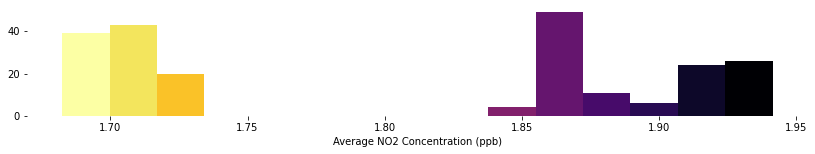

In [328]:
# Histogram
fig, ax = plt.subplots(figsize = (14, 2))
n, bins, patches = plt.hist(df_no2_predict["no2_predicted"], bins = 15)

cm = plt.cm.get_cmap('inferno')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - max(bin_centers)
col /= min(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

ax.set_xlabel("Average NO2 Concentration (ppb)")
for ax, spine in ax.spines.items():
    spine.set_visible(False)

#plt.xlim(0,5)

(0.0, 5.0)

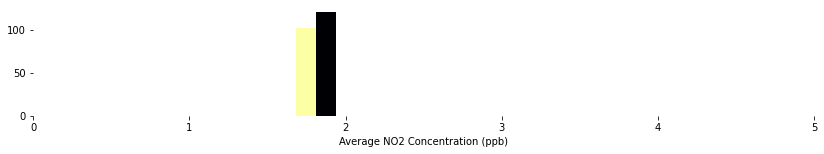

In [329]:
# Histogram
fig, ax = plt.subplots(figsize = (14, 2))
n, bins, patches = plt.hist(df_no2_predict["no2_predicted"], bins = 2)

cm = plt.cm.get_cmap('inferno')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - max(bin_centers)
col /= min(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

ax.set_xlabel("Average NO2 Concentration (ppb)")
for ax, spine in ax.spines.items():
    spine.set_visible(False)

plt.xlim(0,5)
